In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

fp_inv = '/Users/edmondjosephtacordasevilla/Downloads/fct_invoice.csv'
fp_cus = '/Users/edmondjosephtacordasevilla/Downloads/dim_customer.json'

invoices_df = pd.read_csv(fp_inv)
customers_df = pd.read_json(fp_cus)

invoices_df['invoice_date'] = pd.to_datetime(invoices_df['invoice_date'], dayfirst=True)

**EASY PART**

Easy: Q1

In [34]:
print(customers_df.columns)
unique_customers = customers_df['id'].nunique()

Index(['age', 'first_name', 'gender', 'id', 'last_name'], dtype='object')


In [35]:
print("Easy Q1 - Number of unique customers:", unique_customers)

Easy Q1 - Number of unique customers: 5191


Easy: Q2

In [36]:
print(invoices_df[['category']].head())

   category
0  Clothing
1     Shoes
2  Clothing
3     Shoes
4     Books


In [37]:
categories = invoices_df['category'].unique()
print("Easy 2A - Product categories:", categories)

num_categories = len(categories)
print("Easy 2B - Number of unique categories:", num_categories)

Easy 2A - Product categories: ['Clothing' 'Shoes' 'Books' 'Cosmetics' 'Food & Beverage' 'Toys'
 'Technology' 'Souvenir']
Easy 2B - Number of unique categories: 8


Easy: Q3

In [38]:
payment_counts = invoices_df['payment_method'].value_counts()

most_popular_method = payment_counts.idxmax()
print("Easy 3A - Most popular payment method:", most_popular_method)

most_popular_count = payment_counts.max()
print("Easy 3B - Number of times it was used:", most_popular_count)

Easy 3A - Most popular payment method: Cash
Easy 3B - Number of times it was used: 44447


**MEDIUM PART**

Medium: Q1

In [39]:
invoices_df['total_sale'] = invoices_df['quantity'] * invoices_df['price']
category_sales = invoices_df.groupby('category')['total_sale'].sum()
top_3_categories = category_sales.sort_values(ascending=False).head(3)

print("Medium Q1 - Top 3 categories by total sales are:")
print(top_3_categories)

Medium Q1 - Top 3 categories by total sales are:
category
Clothing      1.139968e+08
Shoes         6.655345e+07
Technology    5.786235e+07
Name: total_sale, dtype: float64


Medium: Q2

In [44]:
merged_df = invoices_df.merge(customers_df, left_on='customer_id', right_on='id', how='left')
over_45 = merged_df[merged_df['age'] > 45]
total_sales_over_45 = (over_45['quantity'] * over_45['price']).sum()

print(f"Medium Q2 - Total sales from customers over age 45: ${total_sales_over_45:,.2f}")

Medium Q2 - Total sales from customers over age 45: $82,039,768.15


Medium: Q3

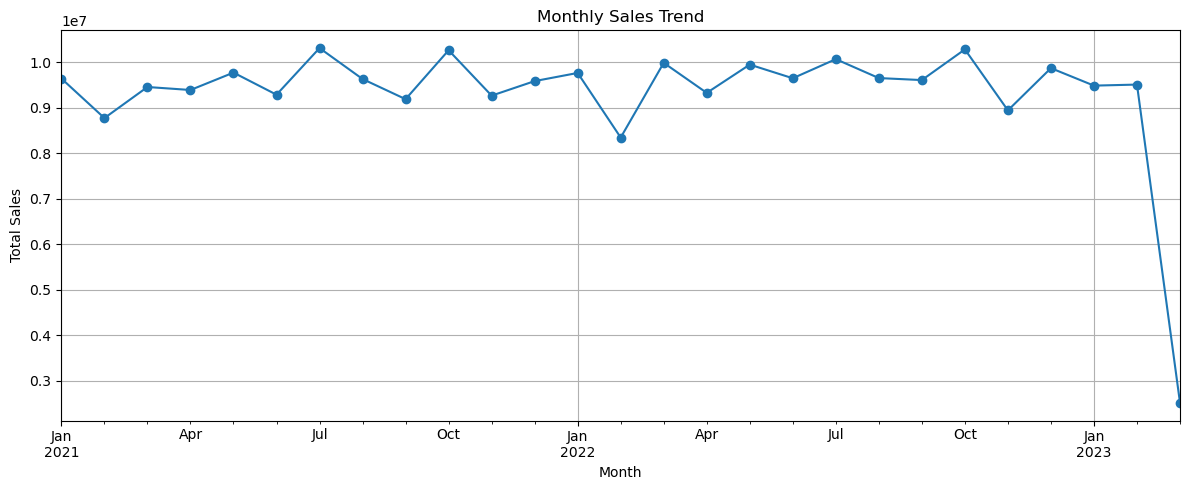

In [46]:
invoices_df['month'] = invoices_df['invoice_date'].dt.to_period('M')
monthly_sales = invoices_df.groupby('month')['total_sale'].sum()

monthly_sales.plot(kind='line', marker='o', figsize=(12, 5), title='Monthly Sales Trend')
plt.ylabel("Total Sales")
plt.xlabel("Month")
plt.grid(True)
plt.tight_layout()
plt.show()

**HARD PART**

In [48]:
merged_df['age_decade'] = (merged_df['age'] // 10 * 10).astype('Int64').astype(str) + 's'
filtered_df = merged_df.dropna(subset=['age'])


In [49]:
pivot = pd.pivot_table(
    filtered_df,
    index='category',
    columns='age_decade',
    values='total_sale',
    aggfunc='sum',
    fill_value=0
)


In [50]:
print("Hard Q1 - Pivot Table: Sales by Category and Age Decade")
display(pivot)

Hard Q1 - Pivot Table: Sales by Category and Age Decade


age_decade,10s,20s,30s,40s,50s,60s,70s,80s
category,,,,,,,,
Books,12801.75,79461.75,84143.10,87203.40,74962.20,80476.80,54827.85,26664.00
Clothing,1927413.84,10250732.80,11354126.96,11215189.92,10321851.76,10660642.08,7769371.28,4493698.00
Cosmetics,109619.36,605915.32,723544.70,665034.96,587780.96,649990.76,419082.62,254531.60
Food & Beverage,13582.31,73491.96,87246.86,89553.29,72425.04,80976.09,55050.98,31332.93
Shoes,993281.35,5924878.24,7200839.66,7025590.02,5852857.84,5978893.54,4480269.05,2628744.60
Souvenir,12375.15,54943.32,64092.72,66391.80,54943.32,55025.43,38673.81,23718.06
Technology,1129800.00,5261550.00,6159300.00,5954550.00,4435200.00,5471550.00,3638250.00,1946700.00
Toys,60426.24,385100.80,420582.40,390906.88,345067.52,363955.20,273244.16,153932.80
